# A short primer on natural language processing (NLP)

_This notebook is part of the material for the talk "Beyond PageRank" on Studienstiftung Winterakademie 2017._

## Dependencies

To run the notebook, install the following dependencies:

- ``NLTK``
- ``scikit-learn``
- Numpy Toolchain (``numpy``, ``scipy``, ``pylab``, ``pandas``, ...)

## Explained Main Concepts

The toolchain presented here includes:

- Tokenization
- Stemming/Lemmatization
- tf-idf feature extraction
- embedding queries and documents in feature space

Some imports

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from pylab import *
%matplotlib inline

import seaborn as sns

sns.set_style("white")

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import numpy as np

from nltk.stem.porter import *

import pandas as pd

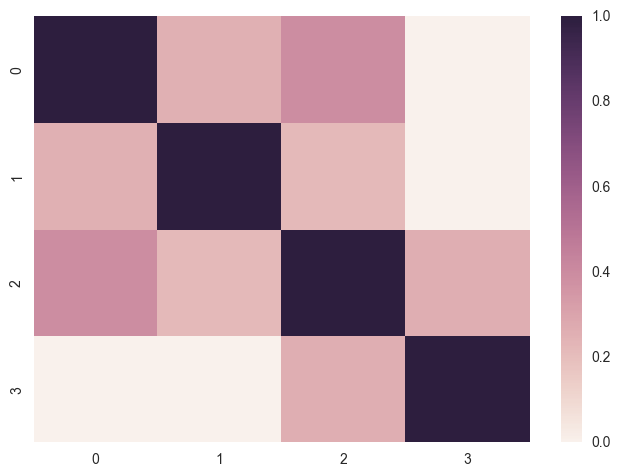

In [2]:
vect = TfidfVectorizer(min_df=1)
tfidf = vect.fit_transform([ "I'd like an apple",
                             "An apple a day keeps the doctor away",
                             "Never compare an apple to an orange",
                             "I prefer scikit-learn to Orange"])
sns.heatmap((tfidf * tfidf.T).A)
show()

Load example data from the NLTK gutenberg dataset. All credits to the Gutenberg project for providing the content.

In [3]:
def get_corpus():
    corpus = {}
    for key in nltk.corpus.gutenberg.fileids():
        text = nltk.corpus.gutenberg.raw(key)
        key_ = key.replace(".txt", "")
        corpus[key_] = text

        print("Loaded {} containing {} characters".format(key_, len(text)))
    return corpus

corpus = get_corpus()

Loaded austen-emma containing 887071 characters
Loaded austen-persuasion containing 466292 characters
Loaded austen-sense containing 673022 characters
Loaded bible-kjv containing 4332554 characters
Loaded blake-poems containing 38153 characters
Loaded bryant-stories containing 249439 characters
Loaded burgess-busterbrown containing 84663 characters
Loaded carroll-alice containing 144395 characters
Loaded chesterton-ball containing 457450 characters
Loaded chesterton-brown containing 406629 characters
Loaded chesterton-thursday containing 320525 characters
Loaded edgeworth-parents containing 935158 characters
Loaded melville-moby_dick containing 1242990 characters
Loaded milton-paradise containing 468220 characters
Loaded shakespeare-caesar containing 112310 characters
Loaded shakespeare-hamlet containing 162881 characters
Loaded shakespeare-macbeth containing 100351 characters
Loaded whitman-leaves containing 711215 characters


## Preprocessing: Stemming, Tokenization, Bag-of-Words

Use the WordNet stemmer.
After preprocessing, a Bag of Words is generated excluding stop words for all documents in the corpus, returned as a matrix.

In [4]:
stemmer = nltk.WordNetLemmatizer()
tokens = {k : word_tokenize(corpus[k]) for k in corpus.keys()}

stemmed_stopwords = [stemmer.lemmatize(t.lower()) for t in stopwords.words('english')]
stemmed_tokens = {k : [stemmer.lemmatize(t.lower()) for t in tokens[k]] for k in corpus.keys()}

In [50]:
index = set()
for k in corpus.keys():
    for token in stemmed_tokens[k]:
        index.add(token)

counts = pd.DataFrame(index=index, columns=corpus.keys(), data=0)

In [51]:
for key in corpus.keys():
    print(key)
    for t in stemmed_tokens[key]:
        if t in stemmed_stopwords:
            continue
        counts[key][t] += 1
counts

shakespeare-hamlet
austen-persuasion
chesterton-thursday
austen-emma
shakespeare-caesar
whitman-leaves
austen-sense
melville-moby_dick
chesterton-brown
bible-kjv
milton-paradise
carroll-alice
burgess-busterbrown
edgeworth-parents
chesterton-ball
blake-poems
shakespeare-macbeth
bryant-stories


,shakespeare-hamlet,austen-persuasion,chesterton-thursday,austen-emma,shakespeare-caesar,whitman-leaves,austen-sense,melville-moby_dick,chesterton-brown,bible-kjv,milton-paradise,carroll-alice,burgess-busterbrown,edgeworth-parents,chesterton-ball,blake-poems,shakespeare-macbeth,bryant-stories
jaffa,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0
krusenstern,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
germanic,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
latched,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
pugilism,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
humpback,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
lemuel,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
fortress,0,0,0,0,0,1,0,4,5,17,0,0,0,0,1,0,0,0
curvicues,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
sanguinary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [52]:
# store as sparse dataframe
scounts = counts.to_sparse(fill_value=0)
print("Density", scounts.density)

Density 0.137591961821421


In [53]:
scounts.to_pickle("corpus_wordcounts.npy")

In [140]:
scounts = pd.read_pickle("corpus_wordcounts.npy")
cols = list(scounts.keys())
scounts.sort_values(by="shakespeare-hamlet", ascending=False)
keywords = (scounts/scounts.sum(axis=0)).prod(axis=1).sort_values(ascending=False)

print(", ".join(list(keywords.index[100:300])))

among, fear, brought, ground, turn, water, wish, arm, dead, sound, lost, none, lay, saying, bed, run, meet, doubt, fall, need, truth, ready, free, close, making, sit, wood, please, secret, fast, red, past, dare, age, met, lie, laugh, noise, tongue, rise, breath, besides, wise, fly, angry, write, shake, [, ], forgot, gently, lettered, care., caring, self-same, 7:57, tumble, flexion, 43:25, interweaving, 119:36, 43:3, no, stomach's, japonica, money-making, elihoenai, erst, vibration, feebleness, 115:14, adze, 2,800, national, ekronites, military, begun, thalia, bezer, reckons, hoof, adiew, magic, 64:12, dreamed, giddy, cavern, evan's, airless, ideality, gold-bound-brow, 3:15, every, unpack, pub-frequenting, syringa, imploring, himselves, merry-mad, ranck, verdigris, richest, ever-returning, snap-shotted, seventy-seven, meekly, mug, etta, afar, moonshine, mac, passport, 23:21, 27:59, confines, gritted, zaccur, ulloa, onset, youthfull, compliment, petrified, dotes, `do, unfixed, 23:48, arn

Create a Bag-of-Words (BOW) and display the words that occur most often

In [55]:
#max_keys = []

#keys = []
#values = []
#for k,v in counts.items():
#    keys.append(k)
#    values.append(int(v))

#bag = pd.DataFrame({"words" : keys, "count" : values}).set_index("words")
#bag = bag.sort_values(by="count",ascending=False)[0:40]
#bag

In [5]:
import scipy

X = scipy.sparse.csr_matrix(scounts.values.T)
X.shape

(18, 48148)

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
tfidf.fit(X)
scores = tfidf.transform(X)

In [90]:
id_bad,  = np.where(scounts.index == "bad")[0]
id_nice, = np.where(scounts.index == "nice")[0]

print(id_bad, id_nice)

9591 13054


In [78]:

print(scores.shape)

for k in range(1):
    print(scores[k,:])

(18, 48148)
  (0, 48117)	0.00081466999824
  (0, 48115)	0.000856338515666
  (0, 48109)	0.00307501059797
  (0, 48102)	0.000856338515666
  (0, 48101)	0.000673774579697
  (0, 48100)	0.00134754915939
  (0, 48098)	0.00074954545914
  (0, 48081)	0.00224863637742
  (0, 48054)	0.00269509831879
  (0, 48044)	0.00171267703133
  (0, 48033)	0.00040733499912
  (0, 47985)	0.00184368859548
  (0, 47977)	0.000526380687402
  (0, 47970)	0.000856338515666
  (0, 47964)	0.00074954545914
  (0, 47955)	0.000856338515666
  (0, 47934)	0.000615002119595
  (0, 47924)	0.00277624530675
  (0, 47913)	0.000856338515666
  (0, 47894)	0.00808529495636
  (0, 47878)	0.000856338515666
  (0, 47852)	0.000460188466644
  (0, 47850)	0.000325645127099
  (0, 47834)	0.00527486608282
  (0, 47829)	0.00074954545914
  :	:
  (0, 253)	0.000673774579697
  (0, 251)	0.00583011514417
  (0, 242)	0.00040733499912
  (0, 219)	0.00299818183656
  (0, 212)	0.000615002119595
  (0, 207)	0.0184368859548
  (0, 202)	0.00040733499912
  (0, 201)	0.00052638068

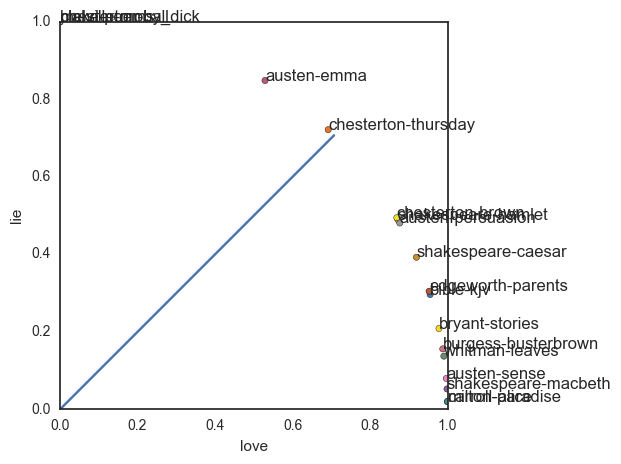

"\namong, fear, brought, ground, turn, water, wish, arm, dead, sound, lost, none, lay, saying, bed,\nrun, meet, doubt, fall, need, truth, ready, free, close, making, sit, wood, please, secret, fast,\nred, past, dare, age, met, lie, laugh, noise, tongue, rise, breath, besides, wise, fly, angry,\nwrite, shake, [, ], forgot, gently, lettered, care., caring, self-same, 7:57, tumble, flexion,\n43:25, interweaving, 119:36, 43:3, no, stomach's, japonica, money-making, elihoenai, erst, vibration,\nfeebleness, 115:14, adze, 2,800, national, ekronites, military, begun, thalia, bezer, reckons, hoof,\nadiew, magic, 64:12, dreamed, giddy, cavern, evan's, airless, ideality, gold-bound-brow, 3:15, every,\nunpack, pub-frequenting, syringa, imploring, himselves, merry-mad, ranck, verdigris, richest,\never-returning, snap-shotted, seventy-seven, meekly, mug, etta, afar, moonshine, mac, passport,\n23:21, 27:59, confines, gritted, zaccur, ulloa, onset, youthfull, compliment, petrified, dotes,\n`do, unfixe

In [144]:
import seaborn as sns
sns.set_style("white")

def plot_embedding(word1, word2):
    id_bad,  = np.where(scounts.index == word1)[0]
    id_nice, = np.where(scounts.index == word2)[0]
    y = np.zeros((18, 2))

    for k in range(18):

        vec = scores[k,:].toarray()[0]

        y[k,0] = vec[id_bad]
        y[k,1] = vec[id_nice]

    y = y / (y**2).sum(axis=-1, keepdims=True)**0.5

    figure(figsize=(5,5))
    scatter(y[:,0], y[:,1], c=range(18), cmap="Set1")
    for i, txt in enumerate(corpus.keys()):
        if "shake" in txt or True:
            annotate(txt, (y[i,0],y[i,1]))
    
    plot(np.linspace(0,1/2**0.5,10), np.linspace(0,1/2**0.5,10))
        
    xlim([0, 1])
    ylim([0, 1])
    xlabel(word1)
    ylabel(word2)

    
def query(query):
    pass

plot_embedding("love", "lie")    
show()

# macbeth —> macht, orakel, schicksaal, könig
# hamlet —>  macht, könig, rache, liebe


"""
among, fear, brought, ground, turn, water, wish, arm, dead, sound, lost, none, lay, saying, bed,
run, meet, doubt, fall, need, truth, ready, free, close, making, sit, wood, please, secret, fast,
red, past, dare, age, met, lie, laugh, noise, tongue, rise, breath, besides, wise, fly, angry,
write, shake, [, ], forgot, gently, lettered, care., caring, self-same, 7:57, tumble, flexion,
43:25, interweaving, 119:36, 43:3, no, stomach's, japonica, money-making, elihoenai, erst, vibration,
feebleness, 115:14, adze, 2,800, national, ekronites, military, begun, thalia, bezer, reckons, hoof,
adiew, magic, 64:12, dreamed, giddy, cavern, evan's, airless, ideality, gold-bound-brow, 3:15, every,
unpack, pub-frequenting, syringa, imploring, himselves, merry-mad, ranck, verdigris, richest,
ever-returning, snap-shotted, seventy-seven, meekly, mug, etta, afar, moonshine, mac, passport,
23:21, 27:59, confines, gritted, zaccur, ulloa, onset, youthfull, compliment, petrified, dotes,
`do, unfixed, 23:48, arnholds, excavating, loyalty, exploded, civitas, clank, anim, 17:9, 1:71,
demonstrate, work-basket, contrasting, winded, hampstead, brandy, _times_, twinge, 'just, woollen-draper,
wedding-cake, wrestling, jeopardy, aiath, ijeabarim, construe, striker, evincing, significance,
'advance, 3:60, solicited, contracted, sourse, infringing, nursing, highly, spungie, undiscoverable,
intimately, what-you-call-him, 81:7, kells, gripped, seyward, benign, putteth, 19:33, aid, cherith,
stimulate, chemarims, 6:53, 68:2, 71:11, thrusteth, absurdity, succeeding, sand-hills, 46:25, hesitate,
charles's, tattersall, meddleth, breez, rid, across, carmelite, sea-crashing, ogre, dragon, 56:5, moony,
unfrequent
"""

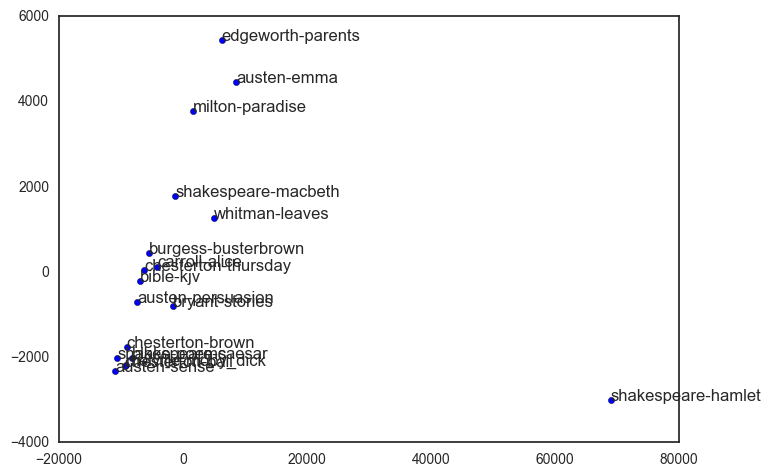

In [58]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

pca = PCA(2)
embedding = pca.fit_transform(X.toarray())

#tsne = TSNE()
#embedding = tsne.fit_transform(x_)

scatter(embedding[:,0], embedding[:,1])
for i, txt in enumerate(corpus.keys()):
    if "shake" in txt or True:
        annotate(txt, (embedding[i,0],embedding[i,1]))
show()

In [69]:
from nltk.collocations import *
trigram_measures = nltk.collocations.TrigramAssocMeasures()

for key in corpus.keys():
    if "shakespeare" in key:
        finder = TrigramCollocationFinder.from_words(
             nltk.corpus.gutenberg.words(key+".txt"))
        print(key)
        print(finder.nbest(trigram_measures.pmi, 30))

shakespeare-macbeth
[('Assassination', 'Could', 'trammell'), ('Lifes', 'fitfull', 'Feuer'), ('Mothers', 'womb', 'Vntimely'), ('Obliuious', 'Antidote', 'Cleanse'), ('Saint', 'Colmes', 'ynch'), ('THE', 'TRAGEDIE', 'OF'), ('TRAGEDIE', 'OF', 'MACBETH'), ('William', 'Shakespeare', '1603'), ('Witchcraft', 'celebrates', 'Pale'), ('choppie', 'finger', 'laying'), ('forge', 'Quarrels', 'vniust'), ('grim', 'Alarme', 'Excite'), ('lated', 'Traueller', 'apace'), ('minutely', 'Reuolts', 'vpbraid'), ('multitudinous', 'Seas', 'incarnardine'), ('sad', 'bosomes', 'empty'), ('womb', 'Vntimely', 'ript'), ('yesty', 'Waues', 'Confound'), ('Accounted', 'dangerous', 'folly'), ('After', 'Lifes', 'fitfull'), ('Auarice', 'stickes', 'deeper'), ('Interdiction', 'stands', 'accust'), ('Iourney', 'Soundly', 'inuite'), ('Neptunes', 'Ocean', 'wash'), ('Pale', 'Heccats', 'Offrings'), ('Ruines', 'wastfull', 'entrance'), ('Winters', 'fire', 'Authoriz'), ('celebrates', 'Pale', 'Heccats'), ('doubly', 'redoubled', 'stroakes')